In [1]:
using CSV
using DataFrames

In [2]:
data = DataFrame(CSV.File("../data/sensor_data_200.txt"; 
        header=["data", "time", "ir", "lidar"]))

,data,time,ir,lidar
,Int64,Int64,Int64,Int64
1,20180122,95819,305,214
2,20180122,95822,299,211
3,20180122,95826,292,199
4,20180122,95829,321,208
5,20180122,95832,298,212
6,20180122,95835,327,212
7,20180122,95838,293,215
8,20180122,95840,309,218
9,20180122,95843,323,208


In [3]:
data[1:5, "lidar"]

5-element Array{Int64,1}:
 214
 211
 199
 208
 212

In [4]:
using PyPlot
using Statistics

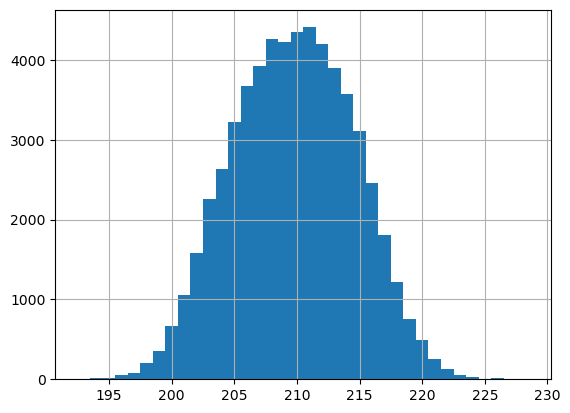

In [5]:
hist(data[:,"lidar"], bins= maximum(data.lidar)-minimum(data.lidar),align="left")
grid("on")

In [6]:
mean1 = sum(data.lidar)/length(data.lidar)
mean2 = mean(data.lidar)
print(mean1," ", mean2)

209.73713297619855 209.73713297619855

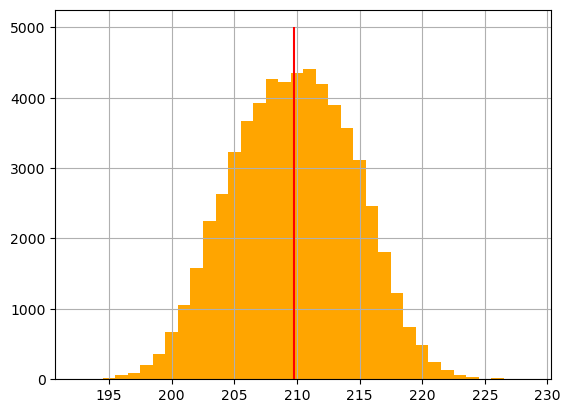

In [7]:
hist(data[:,"lidar"], bins= maximum(data.lidar)-minimum(data.lidar),
    align="left",color="orange")
vlines(mean1, ymin=0, ymax=5000, color="red")
grid("on")

In [8]:
zs = data.lidar
zs_mean = sum(zs)/length(zs)
diff_square = [(z-zs_mean)^2 for z in zs]

sampling_var = sum(diff_square)/length(zs)
unbiased_var = sum(diff_square)/(length(zs)-1)

println(sampling_var)
println(unbiased_var)

statistics_sampling_var = var(zs, corrected=false)
statistics_unbiased_var = var(zs)
println(statistics_sampling_var)
println(statistics_unbiased_var)

23.407709770274206
23.40810659855451
23.40770977027421
23.408106598554514


In [9]:
stddev1 = sqrt(sampling_var)
stddev2 = sqrt(unbiased_var)

statistics_stddev = std(data.lidar)

println(stddev1)
println(stddev2)
println(statistics_stddev)

4.838151482774615
4.83819249292073
4.83819249292073


In [10]:
using StatsBase

In [11]:
freqs_dict = countmap(data.lidar)

tmp_dict = Dict()
for (key, value) in freqs_dict
    tmp_dict[string(key)] = [value, value/length(data.lidar)]
end
freqs = DataFrame(tmp_dict)

,193,194,195,196,197,198,199
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,4.0,10.0,13.0,59.0,84.0,205.0,353.0
2,6.78104e-5,0.000169526,0.000220384,0.0010002,0.00142402,0.00347528,0.00598427


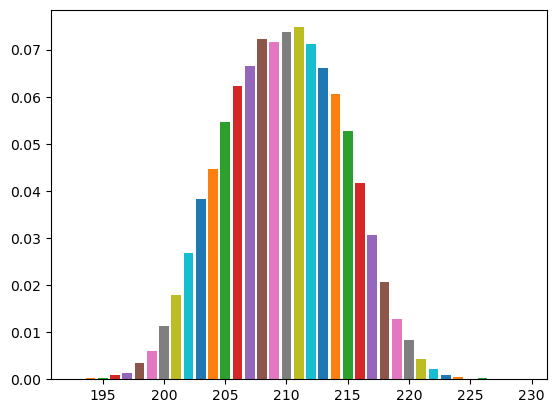

In [12]:
for col in names(freqs)
    bar(parse(Int, col), freqs[2, col])
end

In [13]:
function drawing()
    s = sample(names(freqs),  Weights(Array(freqs[2, :])))
    return parse(Int, s)
end

drawing (generic function with 1 method)

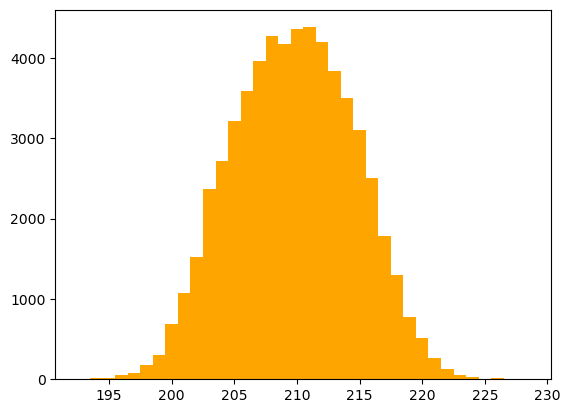

([2.0, 16.0, 17.0, 54.0, 79.0, 177.0, 304.0, 689.0, 1074.0, 1525.0  …  781.0, 512.0, 264.0, 126.0, 51.0, 27.0, 0.0, 14.0, 1.0, 1.0], [193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0  …  220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0], (PyObject <matplotlib.patches.Rectangle object at 0x7fe81dec8d90>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81dec8c10>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81ded52b0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81ded5580>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81ded5850>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81ded5b20>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81ded5df0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81dee6100>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81dee63d0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81dee66a0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe81dee69

In [14]:
samples = [drawing() for i in 1:length(data.lidar)]
simulated = DataFrame(lidar=samples)
p_ = simulated.lidar
hist(p_, bins= maximum(p_)-minimum(p_),
    align="left",color="orange")

In [23]:
function p(z, mu=209.7, dev=23.4)
    return exp(-(z-mu)^2/(2*dev))/sqrt(2*pi*dev)
end

p (generic function with 3 methods)

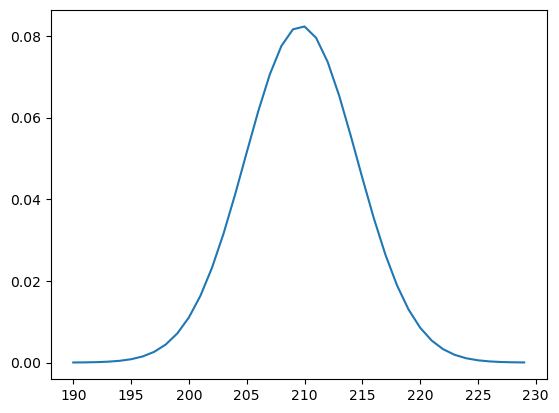

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe81f2feaf0>

In [25]:
zs = Vector(190:230)
ys = [p(z) for z in zs]
plot(zs, ys)

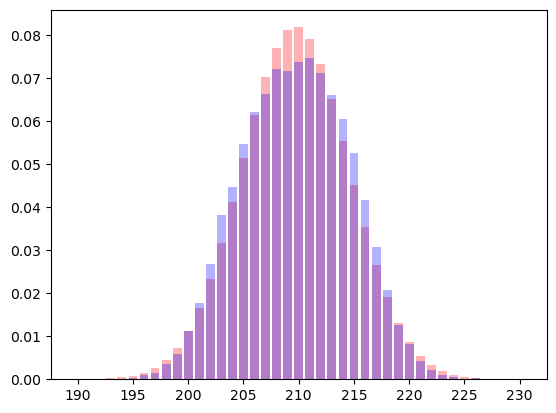

In [29]:
function prob(z, width=0.5)
    return width*(p(z-width) + p(z+width))
end
zs = Vector(190:230)
ys = [prob(z) for z in zs]

bar(zs,ys, color="red", alpha=0.3)
for col in names(freqs)
    bar(parse(Int, col), freqs[2, col], color="blue", alpha=0.3)
end

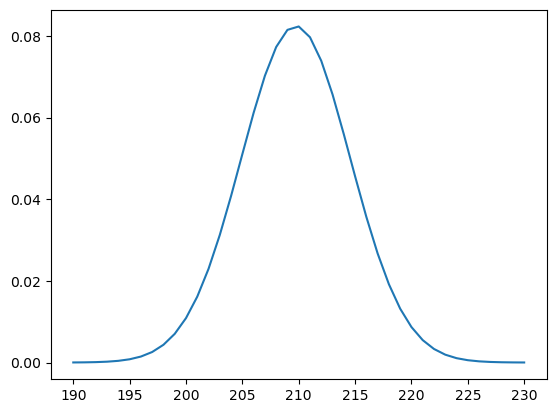

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe822b7e670>

In [36]:
using Distributions

d = Normal(mean1, stddev1)
zs = Vector(190:230)
ys = [pdf(d, z) for z in zs]

plot(zs, ys)

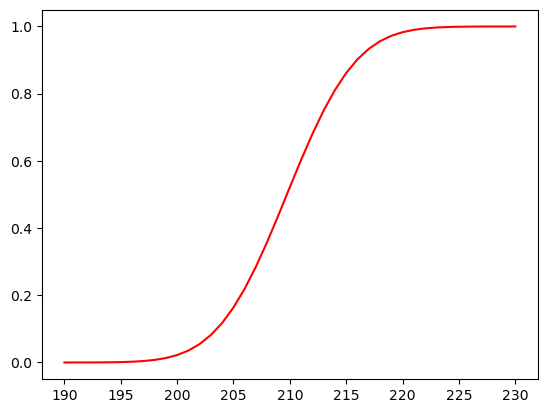

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe822c53a60>

In [38]:
d = Normal(mean1, stddev1)
zs = Vector(190:230)
ys = [cdf(d, z) for z in zs]

plot(zs, ys, color="red")

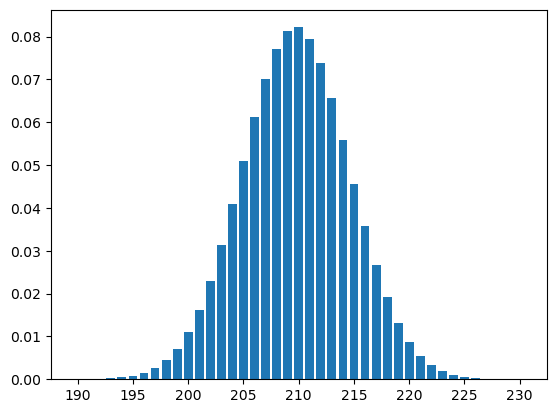

(PyObject <matplotlib.patches.Rectangle object at 0x7fe822cc4c70>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cc4af0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cd1190>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cd1460>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cd1730>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cd1a00>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cd1cd0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cd1fa0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822ce12b0>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822ce1580>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822ce1850>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822ce1b50>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822ce1e20>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cf0130>, PyObject <matplotlib.patches.Rectangle object at 0x7fe822cf0400>, PyObject 

In [39]:
d = Normal(mean1, stddev1)
zs = Vector(190:230)
ys = [cdf(d, z+0.5) - cdf(d, z-0.5) for z in zs]

bar(zs,ys)